In [1]:
import numpy as np
import pandas as pd

In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [3]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [4]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [5]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [6]:
os.listdir(data_dir)

['test.txt', 'train.txt', 'dev.txt']

In [7]:
def get_lines(filename):
  with open(filename,'r') as f:
    return f.readlines()

In [8]:
train_lines = get_lines(data_dir+'train.txt')
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [9]:
def preprocess_text_with_line_numbers(filename):
  input_lines=get_lines(filename)
  abstract_lines=""
  abstract_samples=[]
  
  for line in input_lines:
    if line.startswith('###'):
      abstract_id=line
      abstract_lines=""
    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()

      for abstract_line_number,abstract_line in enumerate(abstract_line_split):
        line_data={}
        target_text_split=abstract_line.split('\t')
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    
    else:
      abstract_lines += line
  
  return abstract_samples

In [10]:
#get data from file and preprocess it
%%time
train_samples=preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples=preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"test.txt")
len(train_samples),len(val_samples),len(test_samples)

CPU times: user 510 ms, sys: 93.5 ms, total: 603 ms
Wall time: 603 ms


In [11]:
#check first abstract of our line data
%%time
train_samples[:14]

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.48 µs


[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [12]:
pd.DataFrame(train_samples).head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [13]:
%%time
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)

CPU times: user 301 ms, sys: 5.8 ms, total: 307 ms
Wall time: 305 ms


In [14]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

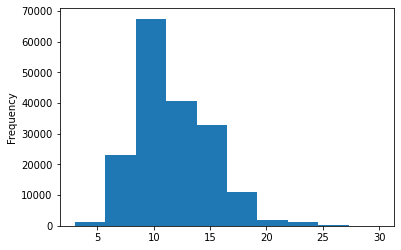

In [15]:
train_df.total_lines.plot.hist()

In [16]:
train_sent=train_df["text"].tolist()
val_sent=val_df["text"].tolist()
test_sent=test_df["text"].tolist()
len(train_sent),len(val_sent),len(test_sent)

(180040, 30212, 30135)

In [17]:
train_sent[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Make Numeric Labels

### Label Encode

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_labels_encoded=le.fit_transform(train_df['target'].to_numpy())
val_labels_encoded=le.transform(val_df['target'].to_numpy())
test_labels_encoded=le.transform(test_df['target'].to_numpy())

In [19]:
type(train_labels_encoded)

numpy.ndarray

In [20]:
train_labels_encoded[:10]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4])

### One hot encodding

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
train_labels_enc=enc.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_enc=enc.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_enc=enc.transform(test_df['target'].to_numpy().reshape(-1,1))

In [22]:
train_df['target']

0           OBJECTIVE
1             METHODS
2             METHODS
3             METHODS
4             METHODS
             ...     
180035        RESULTS
180036        RESULTS
180037        RESULTS
180038    CONCLUSIONS
180039    CONCLUSIONS
Name: target, Length: 180040, dtype: object

In [23]:
train_df['target'].to_numpy()

array(['OBJECTIVE', 'METHODS', 'METHODS', ..., 'RESULTS', 'CONCLUSIONS',
       'CONCLUSIONS'], dtype=object)

In [24]:
train_df['target'].to_numpy().reshape(-1,1)

array([['OBJECTIVE'],
       ['METHODS'],
       ['METHODS'],
       ...,
       ['RESULTS'],
       ['CONCLUSIONS'],
       ['CONCLUSIONS']], dtype=object)

## Creating a series of Model Experiments

### Model 0 : Baseline

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [26]:
model_0 = Pipeline([
                     ("tf-idf", TfidfVectorizer()),
                     ("clf", MultinomialNB())
])
model_0.fit(train_sent,train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
model_0.score(val_sent,val_labels_encoded)

0.7218323844829869

#### Download helper_functions

In [28]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-01-17 11:51:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-17 11:51:51 (55.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [29]:
from helper_functions import calculate_results

In [30]:
baseline_preds=model_0.predict(val_sent)

In [31]:
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [32]:
baseline_results = calculate_results(val_labels_encoded,baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

## Preparing data for deep sequence models

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

In [34]:
sent_lens = [len(sent.split()) for sent in train_sent]

In [35]:
avg_sent_len=np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([1.5999e+05, 1.8760e+04, 1.1510e+03, 9.9000e+01, 2.8000e+01,
        1.0000e+01, 2.0000e+00]),
 array([  1.        ,  43.14285714,  85.28571429, 127.42857143,
        169.57142857, 211.71428571, 253.85714286, 296.        ]),
 <a list of 7 Patch objects>)

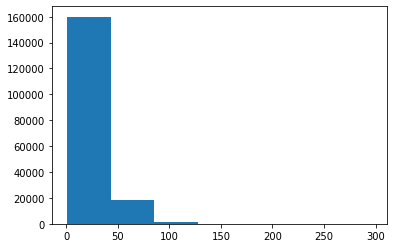

In [36]:
# Distribution of sentence length
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=7)

In [37]:
max(sent_lens)

296

In [38]:
np.percentile(sent_lens,95)

55.0

In [39]:
max_tokens=68000 # length of vocab
output_len=55

In [40]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(max_tokens=max_tokens,
                                  output_sequence_length=output_len)

In [41]:
text_vectorizer.adapt(train_sent)

In [42]:
import random
rand_sent = random.choice(train_sent)
rand_sent, text_vectorizer(rand_sent)

('a total of @ patients , were enrolled in the study .',
 <tf.Tensor: shape=(55,), dtype=int64, numpy=
 array([  8,  76,   4,  12,   9, 230,   5,   2,  17,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0])>)

In [43]:
vocab = text_vectorizer.get_vocabulary()
len(vocab), vocab[:5], vocab[-5:]

(64841,
 ['', '[UNK]', 'the', 'and', 'of'],
 ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp'])

In [44]:
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'idf_weights': None,
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary': None}

### Create custom text embedding

In [45]:
# Create token embedding layer
token_embed=layers.Embedding(input_dim=68000, # length of vocabulary
                             output_dim=128,  # to handle variable sequence length (saving space)
                             mask_zero=True,
                             name="token_embedding")

In [46]:
rand_sent, token_embed(text_vectorizer(rand_sent))

('a total of @ patients , were enrolled in the study .',
 <tf.Tensor: shape=(55, 128), dtype=float32, numpy=
 array([[-0.02668965,  0.03787536,  0.00541804, ..., -0.03029168,
          0.0326525 , -0.02323104],
        [ 0.00487981,  0.03257174,  0.00932934, ..., -0.03705789,
         -0.00724246,  0.02970651],
        [-0.0070755 ,  0.0236568 ,  0.01714734, ..., -0.01475335,
         -0.00962138,  0.03003467],
        ...,
        [-0.04534869,  0.04938536,  0.00531291, ..., -0.00270341,
         -0.01746608,  0.04033239],
        [-0.04534869,  0.04938536,  0.00531291, ..., -0.00270341,
         -0.01746608,  0.04033239],
        [-0.04534869,  0.04938536,  0.00531291, ..., -0.00270341,
         -0.01746608,  0.04033239]], dtype=float32)>)

### Create Dataset as fast as possible

By using `tf.data`

In [47]:
# Turn our data in tensorflow dataset
train_dataset=tf.data.Dataset.from_tensor_slices((train_sent,train_labels_enc)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset=tf.data.Dataset.from_tensor_slices((val_sent,val_labels_enc)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=tf.data.Dataset.from_tensor_slices((test_sent,test_labels_enc)).batch(32).prefetch(tf.data.AUTOTUNE)

##  Model 1 : Conv1D with token embeddings

Input->tokenize->embbed->layers->Output

1. Build model
2. Compile model
3. Train model
4. Evaluate model

In [48]:
num_classes=len(le.classes_)
class_names=le.classes_

In [49]:
# Create 1D convolutional model to process sequences
inputs=layers.Input(shape=(1,), dtype=tf.string)
vect=text_vectorizer(inputs)
emb=token_embed(vect)
x=layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(emb)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes, activation='softmax')(x)
model_1=tf.keras.Model(inputs,outputs)

In [50]:
# Compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [51]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8704000   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [52]:
hist_1 = model_1.fit(train_dataset,
                     steps_per_epoch=int(0.1*len(train_dataset)),
                     epochs=3,
                     validation_data=val_dataset,
                     validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 18s 16ms/step - loss: 0.9170 - accuracy: 0.6346 - val_loss: 0.6920 - val_accuracy: 0.7344
Epoch 2/3
562/562 [==============================] - 9s 15ms/step - loss: 0.6591 - accuracy: 0.7558 - val_loss: 0.6360 - val_accuracy: 0.7656
Epoch 3/3
562/562 [==============================] - 9s 15ms/step - loss: 0.6200 - accuracy: 0.7739 - val_loss: 0.6007 - val_accuracy: 0.7839


In [53]:
len(train_dataset)

5627

In [54]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.6010 - accuracy: 0.7839


[0.6009525060653687, 0.7838938236236572]

In [55]:
model_1_pred_probs=model_1.predict(val_dataset)
model_1_pred_probs

array([[4.2892900e-01, 1.9069500e-01, 6.5034427e-02, 2.9057083e-01,
        2.4770722e-02],
       [4.8230615e-01, 2.4759197e-01, 1.4223507e-02, 2.4734889e-01,
        8.5295793e-03],
       [1.4861849e-01, 8.1740683e-03, 1.3757049e-03, 8.4178811e-01,
        4.3622727e-05],
       ...,
       [2.5495426e-06, 8.1184413e-04, 4.7924026e-04, 2.4121280e-06,
        9.9870396e-01],
       [5.1946271e-02, 4.0689871e-01, 1.1705437e-01, 6.9529817e-02,
        3.5457090e-01],
       [1.8738566e-01, 6.9570142e-01, 3.7353791e-02, 3.4330487e-02,
        4.5228552e-02]], dtype=float32)

In [56]:
# Convert pred_probs to classes
model_1_preds=tf.argmax(model_1_pred_probs)
model_1_preds

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([26215,  6934, 18803, 18181,   845])>

In [57]:
model_1_preds=tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [58]:
len(model_1_preds)

30212

In [59]:
model_1_results=calculate_results(val_labels_encoded, model_1_preds)
model_1_results

{'accuracy': 78.38938170263472,
 'f1': 0.7813111546284417,
 'precision': 0.7803723180725894,
 'recall': 0.7838938170263472}

## Model 2 : Feature extraction with pretrained token embeddings

In [60]:
import tensorflow_hub as hub
tf_hub_embedding_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      trainable=False,
                                      name="universal_sentence_encoder")

In [61]:
rand_sent, tf_hub_embedding_layer([rand_sent])[0][:31], len(tf_hub_embedding_layer([rand_sent]))

('a total of @ patients , were enrolled in the study .',
 <tf.Tensor: shape=(31,), dtype=float32, numpy=
 array([-0.00451278,  0.04286086, -0.042935  ,  0.02393748,  0.00027221,
         0.04637563,  0.05774637,  0.02083014, -0.03109545, -0.06289763,
         0.07638782,  0.01474593,  0.08504441,  0.01038462, -0.00081422,
        -0.01234766, -0.09458657, -0.01758214, -0.01620132, -0.09388242,
        -0.00509607,  0.05474149, -0.04415987, -0.04447574, -0.00157164,
         0.00209275,  0.04880901,  0.03646335,  0.06376301, -0.01285307,
         0.03251874], dtype=float32)>,
 1)

In [62]:
len(tf_hub_embedding_layer([rand_sent])[0])

512

In [63]:
# Define feature extraction model using TF hub layer
inputs=layers.Input(shape=[], dtype=tf.string)
pretrained_embedding=tf_hub_embedding_layer(inputs)
#pretrained_embedding=tf.expand_dims(pretrained_embedding,axis=1)
#x=layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(pretrained_embedding)
#x=layers.GlobalAveragePooling1D()(x)
x=layers.Dense(128, activation='relu')(pretrained_embedding)
outputs=layers.Dense(num_classes, activation='softmax')(x)
model_2=tf.keras.Model(inputs,outputs)

In [64]:
# Compile model
model_2.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [65]:
hist_2=model_2.fit(train_dataset,
                   steps_per_epoch=int(0.1*len(train_dataset)),
                   epochs=3,
                   validation_data=val_dataset,
                   validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 14s 20ms/step - loss: 0.9172 - accuracy: 0.6496 - val_loss: 0.7966 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 11s 19ms/step - loss: 0.7709 - accuracy: 0.7006 - val_loss: 0.7569 - val_accuracy: 0.7001
Epoch 3/3
562/562 [==============================] - 11s 19ms/step - loss: 0.7556 - accuracy: 0.7109 - val_loss: 0.7420 - val_accuracy: 0.7108


In [66]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 15s 16ms/step - loss: 0.7442 - accuracy: 0.7124


[0.7441708445549011, 0.7123659253120422]

In [67]:
model_2_pred_probs=model_2.predict(val_sent)
model_2_pred_probs

array([[0.45235273, 0.3294575 , 0.00245355, 0.20739865, 0.00833766],
       [0.35829526, 0.4835423 , 0.00378567, 0.15150943, 0.00286733],
       [0.2369218 , 0.11111161, 0.01792127, 0.5985727 , 0.03547266],
       ...,
       [0.00221837, 0.0056083 , 0.0616609 , 0.00110552, 0.929407  ],
       [0.00417351, 0.04610747, 0.18621162, 0.00147883, 0.7620286 ],
       [0.16599424, 0.22682747, 0.5132469 , 0.00826829, 0.08566315]],
      dtype=float32)

In [68]:
model_2_preds=tf.argmax(model_2_pred_probs,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [69]:
model_2_results=calculate_results(val_labels_encoded,model_2_preds)
model_2_results

{'accuracy': 71.23659473057063,
 'f1': 0.7094684028643644,
 'precision': 0.7124254984612457,
 'recall': 0.7123659473057063}

## Model 3 : Conv1D with character embeddings

In [70]:
# Make functions to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

In [71]:
split_chars(rand_sent)

'a   t o t a l   o f   @   p a t i e n t s   ,   w e r e   e n r o l l e d   i n   t h e   s t u d y   .'

In [72]:
# Split sequence-level data splits into character-level data splits
train_chars=[split_chars(sentence) for sentence in train_sent]
val_chars=[split_chars(sentence) for sentence in val_sent]
test_chars=[split_chars(sentence) for sentence in test_sent]

In [73]:
train_chars[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [74]:
# Whats the average character length?
char_len=[len(sentence) for sentence in train_sent]
np.mean(char_len)

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <a list of 7 Patch objects>)

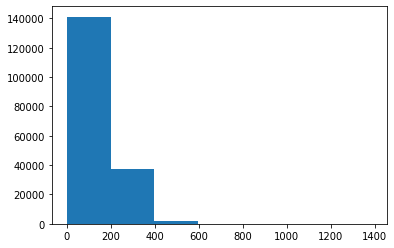

In [75]:
# Check the destribution of our sequence at character-level
import matplotlib.pyplot as plt
plt.hist(char_len,bins=7)

In [76]:
# Find what character length covers 95% of sequence
output_seq_char_len = np.percentile(char_len,95)
output_seq_char_len

290.0

In [77]:
# Get all keyboard chars for character level embedding
import string
alphabet=string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
len(list(alphabet))

68

In [79]:
# Create char level token vectorizer instance
NUM_CHAR_TOKENS=len(alphabet)+2 # +2 for space and OOV token
char_le=TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                          output_sequence_length=int(output_seq_char_len),
                          name="char_vectorizer")

In [80]:
# Adapt character vectorizer to train_sent
char_le.adapt(train_chars)

In [81]:
char_vocab=char_le.get_vocabulary()
print(len(char_vocab))
print(char_vocab[:7])
print(char_vocab[-5:])

28
['', '[UNK]', 'e', 't', 'i', 'a', 'n']
['k', 'x', 'z', 'q', 'j']


In [82]:
rand_chars=random.choice(train_chars)
print(rand_chars)
print(" ")
print(len(rand_chars.split()))
print(" ")
print(char_le([rand_chars]))
print(" ")
print(len(char_le(rand_chars)))

b y   d e s i g n   ,   m a p   w a s   n o t   d i f f e r e n t   b e t w e e n   l s   a n d   h s   c o n d i t i o n s   a n d   u r i n a r y   s o d i u m   e x c r e t i o n   i n c r e a s e d   o n   h s   d i e t   (   p   <   @   )   .
 
99
 
tf.Tensor(
[[22 19 10  2  9  4 18  6 15  5 14 20  5  9  6  7  3 10  4 17 17  2  8  2
   6  3 22  2  3 20  2  2  6 12  9  5  6 10 13  9 11  7  6 10  4  3  4  7
   6  9  5  6 10 16  8  4  6  5  8 19  9  7 10  4 16 15  2 24 11  8  2  3
   4  7  6  4  6 11  8  2  5  9  2 10  7  6 13  9 10  4  2  3 14  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [83]:
len(rand_chars.split()), len(list(rand_chars))

(99, 247)

### Creating char level embedding

In [84]:
# Create char embedding layer
char_embedd=layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                             output_dim=25,
                             mask_zero=False,
                             name="char_embedding")

In [85]:
char_embedd(char_le([rand_chars]))

<tf.Tensor: shape=(1, 290, 25), dtype=float32, numpy=
array([[[ 0.00147025, -0.00732682,  0.02763588, ...,  0.02036579,
         -0.01909298, -0.02009621],
        [-0.00080457, -0.00177981,  0.04660283, ...,  0.01869558,
          0.00049808, -0.03973104],
        [-0.00941741, -0.02769406, -0.03332742, ..., -0.00558059,
          0.02357422, -0.00892985],
        ...,
        [-0.04075624, -0.01468875, -0.01857262, ..., -0.03386642,
         -0.00226307, -0.03492641],
        [-0.04075624, -0.01468875, -0.01857262, ..., -0.03386642,
         -0.00226307, -0.03492641],
        [-0.04075624, -0.01468875, -0.01857262, ..., -0.03386642,
         -0.00226307, -0.03492641]]], dtype=float32)>

### Building Conv1D model to fit character embedding

In [86]:
# Build model
inputs=layers.Input(shape=(1,), dtype=tf.string)
vect=char_le(inputs)
emb=char_embedd(vect)
x=layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(emb)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(num_classes, activation='softmax')(x)
model_3=tf.keras.Model(inputs,
                       outputs,
                       name="conv1d_char_embedding")

In [87]:
# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [88]:
model_3.summary()

Model: "conv1d_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embedding (Embedding)  (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5)       

In [89]:
# Create datasets
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_enc)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_enc)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_enc)).batch(32).prefetch(tf.data.AUTOTUNE)

In [90]:
# Fit data
hist_3=model_3.fit(train_char_dataset,
                   steps_per_epoch=int(0.1*len(train_char_dataset)),
                   epochs=3,
                   validation_data=val_char_dataset,
                   validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 6s 10ms/step - loss: 1.2526 - accuracy: 0.4957 - val_loss: 1.0370 - val_accuracy: 0.5974
Epoch 2/3
562/562 [==============================] - 5s 10ms/step - loss: 0.9985 - accuracy: 0.5972 - val_loss: 0.9315 - val_accuracy: 0.6333
Epoch 3/3
562/562 [==============================] - 5s 10ms/step - loss: 0.9218 - accuracy: 0.6372 - val_loss: 0.8624 - val_accuracy: 0.6662


In [91]:
# Evaluate model
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.8787 - accuracy: 0.6581


[0.8786633610725403, 0.6581159830093384]

In [92]:
model_3_pred_probs=model_3.predict(val_char_dataset)
model_3_pred_probs

array([[0.19422798, 0.4292552 , 0.0314032 , 0.30330485, 0.04180867],
       [0.49798262, 0.3269372 , 0.00300991, 0.154365  , 0.01770534],
       [0.28495514, 0.11200547, 0.03242624, 0.55617493, 0.01443822],
       ...,
       [0.04227867, 0.06227628, 0.11608868, 0.0783959 , 0.7009605 ],
       [0.06139274, 0.15310508, 0.18191369, 0.07809411, 0.5254944 ],
       [0.31554037, 0.4281327 , 0.16081856, 0.07920116, 0.0163073 ]],
      dtype=float32)

In [93]:
model_3_preds=tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 0, 3, ..., 4, 4, 1])>

In [94]:
model_3_results=calculate_results(val_labels_encoded,model_3_preds)
model_3_results

{'accuracy': 65.8115980405137,
 'f1': 0.6486840876721319,
 'precision': 0.6493453255586786,
 'recall': 0.6581159804051371}

## Model 4 : Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

In [95]:
# Setup token inputs/model
token_inputs=layers.Input(shape=[], dtype=tf.string,name="token_inputs")
token_emb=tf_hub_embedding_layer(token_inputs)
token_outputs=layers.Dense(128, activation='relu')(token_emb)
token_model=tf.keras.Model(token_inputs,token_outputs)

# Setup char inputs/model
char_inputs=layers.Input(shape=(1,), dtype=tf.string,name="char_inputs")
char_vect=char_le(char_inputs)
char_emb=char_embedd(char_vect)
char_bi_lstm=layers.Bidirectional(layers.LSTM(25))(char_emb)
char_model=tf.keras.Model(char_inputs,char_bi_lstm)

# Concatenate token and char outputs
token_char_concat=layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                char_model.output])

# Create output layers
combined_dropout=layers.Dropout(0.5)(token_char_concat)
combined_dense=layers.Dense(200, activation="relu")(combined_dropout) 
final_dropout=layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes, activation="softmax")(final_dropout)

# Construct a model with token and char outputs
model_4=tf.keras.Model(inputs=[token_model.input, char_model.input],
                       outputs=output_layer,
                       name="model_5_token_char_embeddin")

In [96]:
model_4.summary()

Model: "model_5_token_char_embeddin"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token

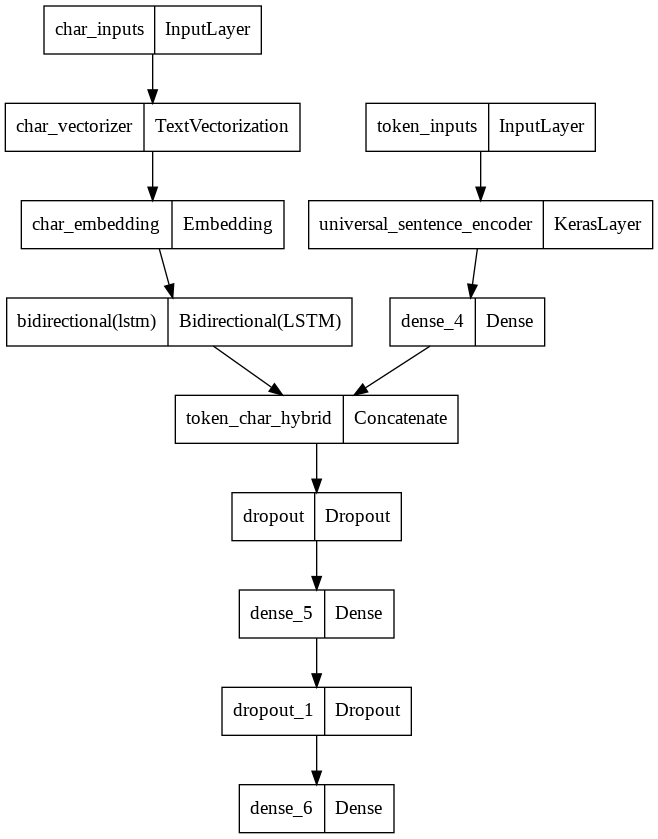

In [97]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [98]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

These model requires two inputs, 1) token level and 2) char level

We need to combine token and character data into `tf.data` dataset

### Combining token and char data into `tf.data` dataset

In [99]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sent, train_chars))
train_char_token_label=tf.data.Dataset.from_tensor_slices(train_labels_enc)
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_label))

# Prefetch and batch train data
train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Repeat for validation data
val_char_token_data=tf.data.Dataset.from_tensor_slices((val_sent,val_chars))
val_char_token_label=tf.data.Dataset.from_tensor_slices(val_labels_enc)
val_char_token_dataset=tf.data.Dataset.zip((val_char_token_data,val_char_token_label)).batch(32).prefetch(tf.data.AUTOTUNE)

In [100]:
# Checking token and char datasets
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

### Fitting the model

In [101]:
hist_4 = model_4.fit(train_char_token_dataset,
                     steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                     epochs=3,
                     validation_data=val_char_token_dataset,
                     validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 72s 119ms/step - loss: 0.9759 - accuracy: 0.6118 - val_loss: 0.7693 - val_accuracy: 0.7061
Epoch 2/3
562/562 [==============================] - 65s 116ms/step - loss: 0.7968 - accuracy: 0.6923 - val_loss: 0.7056 - val_accuracy: 0.7337
Epoch 3/3
562/562 [==============================] - 65s 116ms/step - loss: 0.7711 - accuracy: 0.7033 - val_loss: 0.6866 - val_accuracy: 0.7417


In [102]:
# Evaluating model
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 49s 51ms/step - loss: 0.6941 - accuracy: 0.7341


[0.6940675377845764, 0.7340791821479797]

In [103]:
model_4_pred_probs=model_4.predict(val_char_token_dataset)
model_4_pred_probs

array([[3.8476589e-01, 3.9428329e-01, 2.7810747e-03, 2.1230738e-01,
        5.8624456e-03],
       [2.7640605e-01, 5.5690134e-01, 2.2005267e-03, 1.6255516e-01,
        1.9368642e-03],
       [2.7981296e-01, 1.4628789e-01, 3.5417557e-02, 5.1349819e-01,
        2.4983441e-02],
       ...,
       [5.9503090e-04, 1.0150898e-02, 4.1293107e-02, 1.7560988e-04,
        9.4778532e-01],
       [6.3868538e-03, 5.6234457e-02, 2.8332001e-01, 2.5011729e-03,
        6.5155756e-01],
       [2.8530535e-01, 4.1499239e-01, 2.1175329e-01, 2.9488288e-02,
        5.8460668e-02]], dtype=float32)

In [104]:
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [105]:
model_4_results=calculate_results(val_labels_encoded,model_4_preds)
model_4_results

{'accuracy': 73.407917383821,
 'f1': 0.7307503543848767,
 'precision': 0.7348954735655049,
 'recall': 0.73407917383821}

## Model 5 : Transfer learning with pretrained token embeddings + character embeddings + positional embedding

In [106]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


### Create positional embedding

In [107]:
# How many different line numbers are there
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

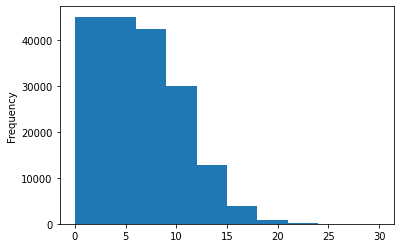

In [108]:
train_df.line_number.plot.hist()

In [109]:
# Use tensorflow to create one-hot-encoded tensors of our "line_number column"
train_line_number_one_hot=tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_number_one_hot=tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_number_one_hot=tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [110]:
train_line_number_one_hot.shape, train_line_number_one_hot[:5]

(TensorShape([180040, 15]), <tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>)

In [111]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

In [112]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

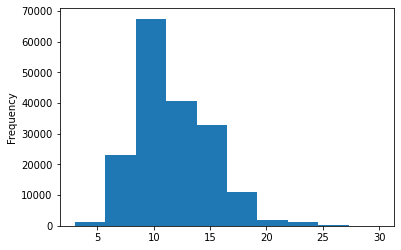

In [113]:
train_df["total_lines"].plot.hist()

In [114]:
np.percentile(train_df["total_lines"], 98)

20.0

In [115]:
train_total_lines_one_hot=tf.one_hot(train_df["total_lines"].to_numpy(), 20)
val_total_lines_one_hot=tf.one_hot(val_df["total_lines"].to_numpy(), 20)
test_total_lines_one_hot=tf.one_hot(test_df["total_lines"].to_numpy(), 20)

In [116]:
train_total_lines_one_hot.shape, train_total_lines_one_hot[:5]

(TensorShape([180040, 20]), <tf.Tensor: shape=(5, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.]], dtype=float32)>)

### Building Tribrid Embedding model

In [117]:
# Token embedding model
token_inputs=layers.Input(shape=[], dtype=tf.string)
token_emb=tf_hub_embedding_layer(token_inputs)
token_outputs=layers.Dense(128, activation="relu")(token_emb)
token_model=tf.keras.Model(token_inputs,token_outputs)

# Char embedding model
char_inputs=layers.Input(shape=(1,), dtype=tf.string)
char_vects=char_le(char_inputs)
char_emb=char_embedd(char_vects)
char_bi_lstm=layers.Bidirectional(layers.LSTM(32))(char_emb)
char_model=tf.keras.Model(char_inputs,char_bi_lstm)

# Line numbers Model
line_number_inputs=layers.Input(shape=(15,), dtype=tf.int32, name="line_number_inputs")
line_number_outputs=layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model=tf.keras.Model(line_number_inputs, line_number_outputs)

# Total lines Model
total_lines_inputs=layers.Input(shape=(20,), dtype=tf.int32, name="total_line_inputs")
total_lines_outputs=layers.Dense(32, activation="relu")(total_lines_inputs)
total_lines_model=tf.keras.Model(total_lines_inputs, total_lines_outputs)

# Combine token and char models
combined_emb=layers.Concatenate(name="char_token_model")([token_model.output, char_model.output])
z=layers.Dense(256, activation="relu")(combined_emb)
z=layers.Dropout(0.5)(z)

# combine Positional embedding with Combined token-char embedding
z=layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                             total_lines_model.output,
                                                             z])

# Create output layer
output_layer=layers.Dense(num_classes, activation="softmax", name="output_layer")(z)

# Put models together
model_5=tf.keras.Model(inputs=[line_number_model.input,
                               total_lines_model.input,
                               token_model.input,
                               char_model.input],
                       outputs=output_layer)

In [118]:
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['input_5[0][0]']                
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['input_4[0][0]']          

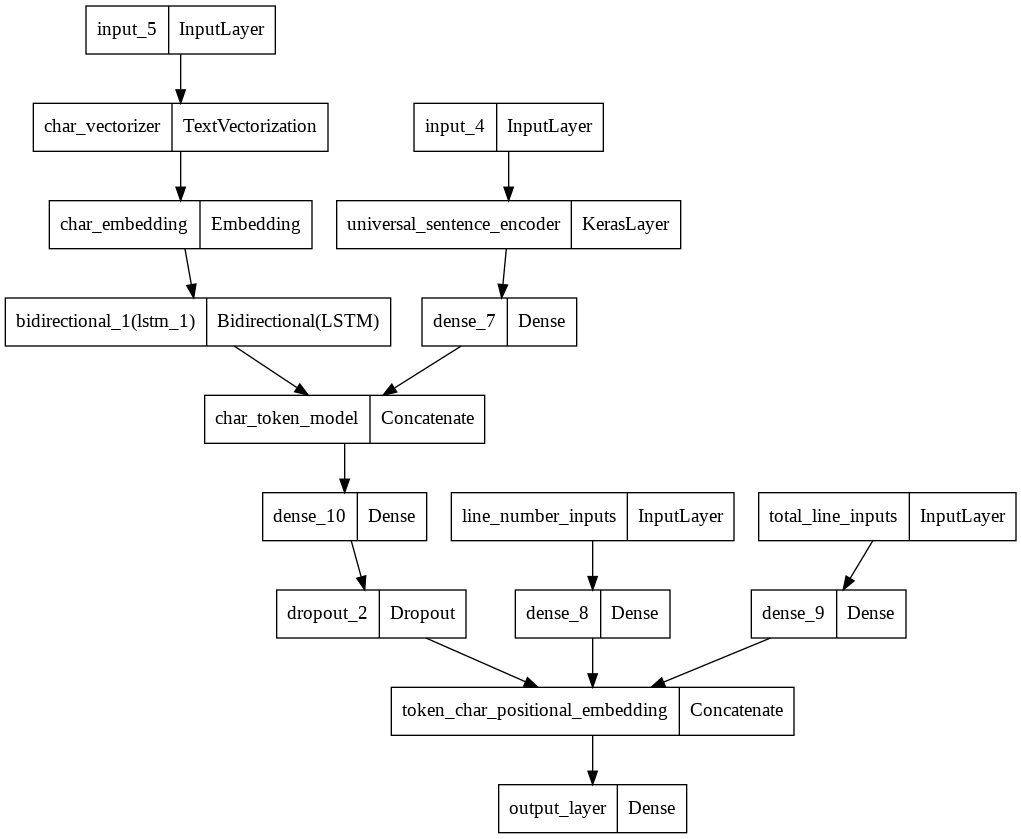

In [119]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [120]:
# Check which layers of model is trainable
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f52d179b090> True
<keras.engine.input_layer.InputLayer object at 0x7f52bed51990> True
<keras.layers.preprocessing.text_vectorization.TextVectorization object at 0x7f52d178a0d0> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7f534e3a22d0> False
<keras.layers.embeddings.Embedding object at 0x7f52d175b5d0> True
<keras.layers.core.dense.Dense object at 0x7f52d17ada10> True
<keras.layers.wrappers.Bidirectional object at 0x7f52d6e4eb90> True
<keras.layers.merge.Concatenate object at 0x7f52d707d590> True
<keras.engine.input_layer.InputLayer object at 0x7f52bedb5110> True
<keras.engine.input_layer.InputLayer object at 0x7f52d6f5d910> True
<keras.layers.core.dense.Dense object at 0x7f52beb3b810> True
<keras.layers.core.dense.Dense object at 0x7f52bec99c10> True
<keras.layers.core.dense.Dense object at 0x7f52bebd3290> True
<keras.layers.core.dropout.Dropout object at 0x7f52bebd5410> True
<keras.layers.merge.Concatenate object at 0x7f52be

In [121]:
len([layer for layer in model_5.layers])

16

In [122]:
# Combine token-char-positional model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer="Adam",
                metrics=["accuracy"])

Create training and validation dataset

In [123]:
# Training dataset
train_pos_char_token_data=tf.data.Dataset.from_tensor_slices((train_line_number_one_hot,
                                                              train_total_lines_one_hot,
                                                              train_sent,
                                                              train_chars))
train_pos_char_token_label=tf.data.Dataset.from_tensor_slices(train_labels_enc)
train_pos_char_token_dataset=tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_label)).batch(32).prefetch(tf.data.AUTOTUNE)

In [124]:
# Validation dataset
val_pos_char_token_data=tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
                                                            val_total_lines_one_hot,
                                                            val_sent,
                                                            val_chars))
val_pos_char_token_label=tf.data.Dataset.from_tensor_slices(val_labels_enc)
val_pos_char_token_dataset=tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_label)).batch(32).prefetch(tf.data.AUTOTUNE)

In [125]:
# Fit token-char-position model
hist_5=model_5.fit(train_pos_char_token_dataset,
                   steps_per_epoch=int(0.1*len(train_pos_char_token_dataset)),
                   epochs=3,
                   validation_data=val_pos_char_token_dataset,
                   validation_steps=int(0.1*len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 71s 119ms/step - loss: 1.0959 - accuracy: 0.7214 - val_loss: 0.9840 - val_accuracy: 0.8082
Epoch 2/3
562/562 [==============================] - 65s 116ms/step - loss: 0.9682 - accuracy: 0.8146 - val_loss: 0.9496 - val_accuracy: 0.8281
Epoch 3/3
562/562 [==============================] - 65s 116ms/step - loss: 0.9500 - accuracy: 0.8248 - val_loss: 0.9391 - val_accuracy: 0.8328


In [126]:
# Evaluate model
model_5.evaluate(val_pos_char_token_dataset)

945/945 [==============================] - 50s 53ms/step - loss: 0.9375 - accuracy: 0.8317


[0.9375020861625671, 0.8317224979400635]

In [127]:
model_5_pred_probs=model_5.predict(val_pos_char_token_dataset)
model_5_pred_probs

array([[0.45297417, 0.1184195 , 0.01206246, 0.39892992, 0.01761395],
       [0.5044085 , 0.11067397, 0.06402382, 0.30882236, 0.0120713 ],
       [0.25019503, 0.1100411 , 0.16538034, 0.3910688 , 0.08331468],
       ...,
       [0.03421466, 0.0941968 , 0.03479437, 0.0332026 , 0.80359155],
       [0.02748853, 0.2680643 , 0.07747756, 0.0235835 , 0.6033861 ],
       [0.176004  , 0.6076657 , 0.12549023, 0.0416594 , 0.04918069]],
      dtype=float32)

In [128]:
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [129]:
model_5_results=calculate_results(val_labels_encoded, model_5_preds)
model_5_results

{'accuracy': 83.17224943730967,
 'f1': 0.8308597748396398,
 'precision': 0.830455355980093,
 'recall': 0.8317224943730968}